Using forward in time, central in space for the 1D heat equation 

In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [3]:
pyplot.rcParams['font.size']=16

In [19]:
L=1.0 #length of the road
nx=51 #number of points
dx=L/(nx-1)
alpha=1.22e-3 #thermal diffusivity

x=numpy.linspace(0.0,L,num=nx)

T0=numpy.zeros(nx) #create the array for temperature
T0[0]=100.0

In [20]:
def ftcs(T0,nt,dt,dx,alpha):
    T=T0.copy()#do this so we don't change the value of the initial condition
    sigma=alpha*dt/dx**2
    for n in range(nt):
        T[1:-1]=(T[1:-1] + sigma * (T[:-2] - 2*T[1:-1] + T[2:]))
        
    return T

In [21]:
nt=100
sigma=0.5
dt=sigma*dx**2/alpha
T=ftcs(T0,nt,dt,dx,alpha)

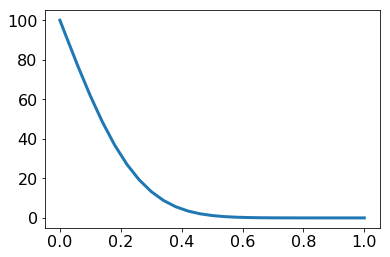

In [22]:
pyplot.plot(x,T,lw=3)
#lw stands for line width

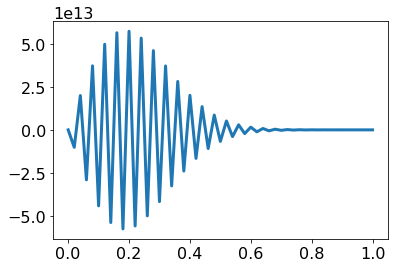

In [23]:
nt=100
sigma=0.6
dt=sigma*dx**2/alpha
T=ftcs(T0,nt,dt,dx,alpha)

pyplot.plot(x,T,lw=3)

Scheme is explicit now so we broke the stability condition of sigma =< 0.5

Use Von Neumann condition for last term in array now. use dirlcect on left side and neumann on right side.

In [24]:
def ftcs_mixed_bcs(T0,nt,dt,dx,alpha):
    T=T0.copy()
    sigma=alpha*dt/dx**2
    for n in range(nt):
        T[1:-1]=(T[1:-1] + sigma * (T[:-2] - 2*T[1:-1] + T[2:]))
        #Neumann condition with zero gradient
        T[-1]=T[-2]
        
    return T

63.1 ms ± 17.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


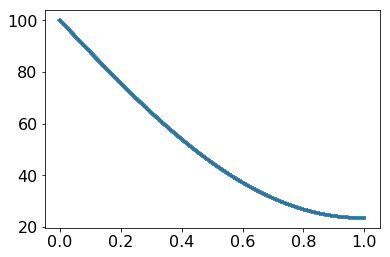

In [26]:
%%timeit

nt=1000
sigma=0.5
dt=sigma*dx**2/alpha

T2=ftcs_mixed_bcs(T0,nt,dt,dx,alpha)
pyplot.plot(x,T2,lw=3)